#1. Mount Drive

from google.colab import drive
drive.mount('/gdrive')

!ls -al '/gdrive/My Drive/data'

#2. Korean Characters

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

런타임 - 런타임 다시 시작

matplotlib의 폰트를 Nanum 폰트로 지정

In [1]:
# Import pyplot as a alias 'plt'
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 전역 폰트 설정
plt.rc('font', family='NanumGothic') 

#3. Load Data

In [3]:
import pandas as pd

In [4]:
# Load a file under "data" folder
# file = "/gdrive/My Drive/data/data_2020.csv"
file = "data/data_2020.csv"
data = pd.read_csv(file)

In [5]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


#4. 집계시

In [7]:
data_06_22 = data[data.집계시.isin(range(6,23))]

In [8]:
# Create data_06_22 Dataframe with counting by 집계시
data_06_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
82028,20200715,6,101,140,16775,2
125225,20201026,6,101,110,5101,0
66049,20200609,6,101,105,713,1
66048,20200609,6,101,105,816,1
76951,20200704,6,101,135,10050,5
...,...,...,...,...,...,...
74174,20200628,22,101,105,765,6
74175,20200628,22,101,105,870,6
74176,20200628,22,101,105,849,6
107489,20200915,22,101,115,6371,1


In [9]:
data_06_22_counting = data_06_22['집계시'].value_counts()

In [10]:
data_06_22_counting

13    7092
14    7091
12    7089
15    7078
11    7059
10    7038
16    7011
9     7008
17    6919
8     6849
18    6742
19    6627
7     6614
20    6518
21    6284
22    6130
6     6095
Name: 집계시, dtype: int64

In [11]:
data_06_22_counting_sorted = data_06_22_counting.sort_index()

In [12]:
data_06_22_counting_sorted

6     6095
7     6614
8     6849
9     7008
10    7038
11    7059
12    7089
13    7092
14    7091
15    7078
16    7011
17    6919
18    6742
19    6627
20    6518
21    6284
22    6130
Name: 집계시, dtype: int64

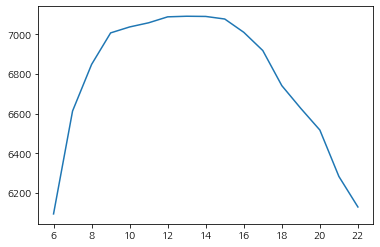

In [13]:
plt.plot(data_06_22_counting_sorted.index, data_06_22_counting_sorted.values)

In [14]:
# Store index of data_06_22_counting into x
x = data_06_22_counting_sorted.index

In [15]:
labels = [str(i)+'시' for i in x]

In [16]:
labels

['6시',
 '7시',
 '8시',
 '9시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시']

In [17]:
# Store values of data_06_22_counting into values
values = data_06_22_counting_sorted.values

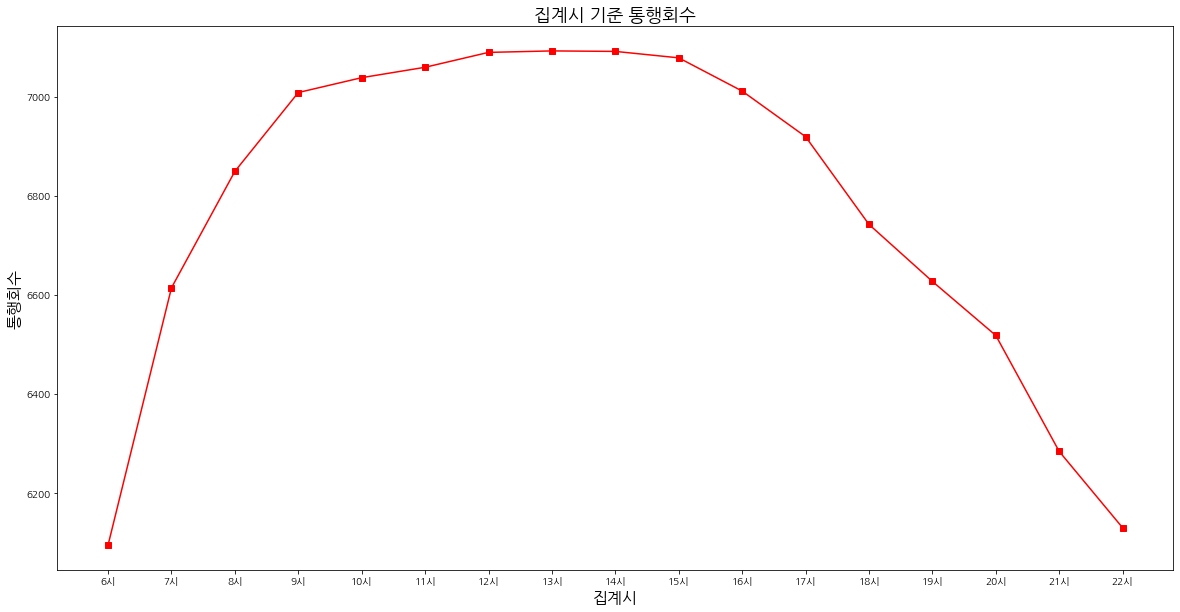

In [18]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae Line Chart
plt.plot(labels, values, marker='s', color='r')
# Generate labels and title
plt.title("집계시 기준 통행회수",fontsize=18)
plt.xlabel('집계시', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#5. 도착영업소코드

In [19]:
data_destination_counting = data['도착영업소코드'].value_counts()

In [20]:
data_destination_counting

105    49738
110    38526
115    26354
140     8954
130     7793
135     7428
125     7339
120     6738
Name: 도착영업소코드, dtype: int64

In [21]:
data_destination_counting_sorted = data_destination_counting.sort_index()

In [22]:
data_destination_counting_sorted

105    49738
110    38526
115    26354
120     6738
125     7339
130     7793
135     7428
140     8954
Name: 도착영업소코드, dtype: int64

In [23]:
# Store index of data_destination_counting into x
x = data_destination_counting_sorted.index

In [24]:
labels = [str(i) for i in x]

In [25]:
labels

['105', '110', '115', '120', '125', '130', '135', '140']

In [26]:
#101,서울 105,기흥 110,목천 115,대전 120,황간 125,남구미 130,동김천 135,경주 140,부산
labels = ['기흥', '목천', '대전', '황간', '남구미', '동김천', '경주', '부산']

In [27]:
# Store values of data_destination_counting into values
values = data_destination_counting_sorted.values

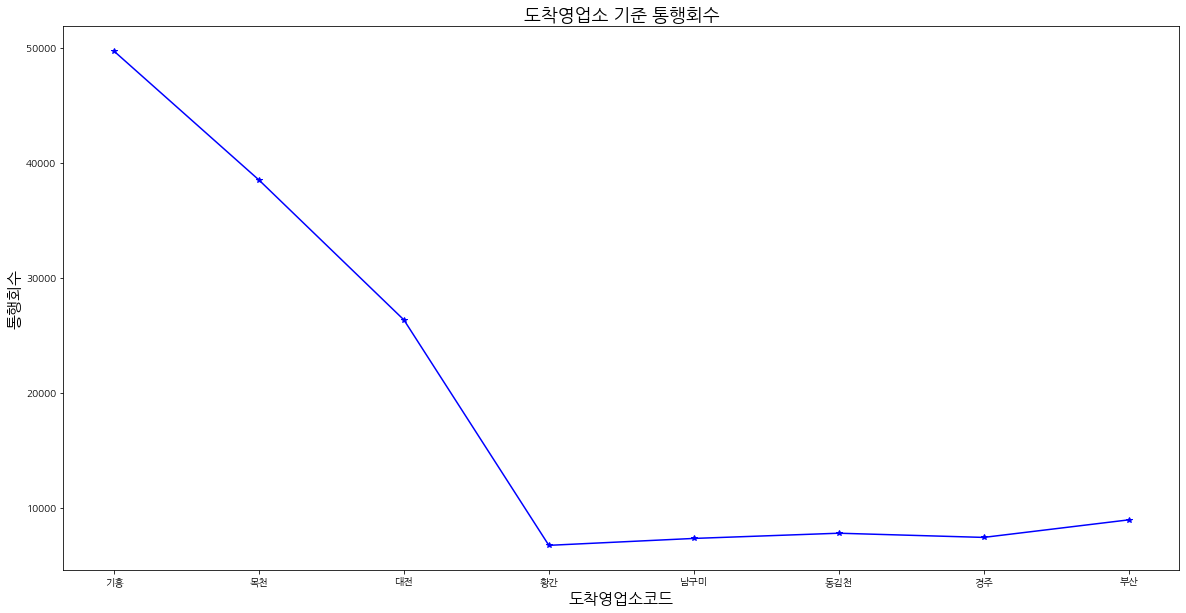

In [28]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae Line Chart
plt.plot(labels, values, marker='*', color='b')
# Generate labels and title
plt.title("도착영업소 기준 통행회수",fontsize=18)
plt.xlabel('도착영업소코드', fontdict= {'size':16})
plt.ylabel('통행회수', fontdict= {'size':16})
# Show plot
plt.show()

#6. 요일

In [29]:
data_weekdays = data.groupby(by=['요일']).mean()

In [30]:
data_weekdays

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간
요일,,,,,
0,2.020067e+07,11.683470,101.0,114.514421,4996.570234
1,2.020068e+07,11.737415,101.0,113.989833,4910.737777
2,2.020067e+07,11.827274,101.0,113.987466,4935.059694
3,2.020067e+07,11.848829,101.0,114.064699,5010.163163
4,2.020066e+07,11.899089,101.0,114.412568,5266.038707
5,2.020067e+07,11.308268,101.0,114.824635,5433.593481
6,2.020067e+07,12.334229,101.0,115.022740,4996.278929


In [31]:
data_weekdays_time = data_weekdays['통행시간']

In [32]:
data_weekdays_time

요일
0    4996.570234
1    4910.737777
2    4935.059694
3    5010.163163
4    5266.038707
5    5433.593481
6    4996.278929
Name: 통행시간, dtype: float64

In [33]:
x = data_weekdays_time.index

In [34]:
x

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='요일')

In [35]:
labels = ['월', '화', '수', '목', '금', '토', '일']

In [36]:
values = data_weekdays_time.values

In [37]:
values

array([4996.57023353, 4910.73777677, 4935.0596942 , 5010.16316325,
       5266.03870674, 5433.59348111, 4996.27892914])

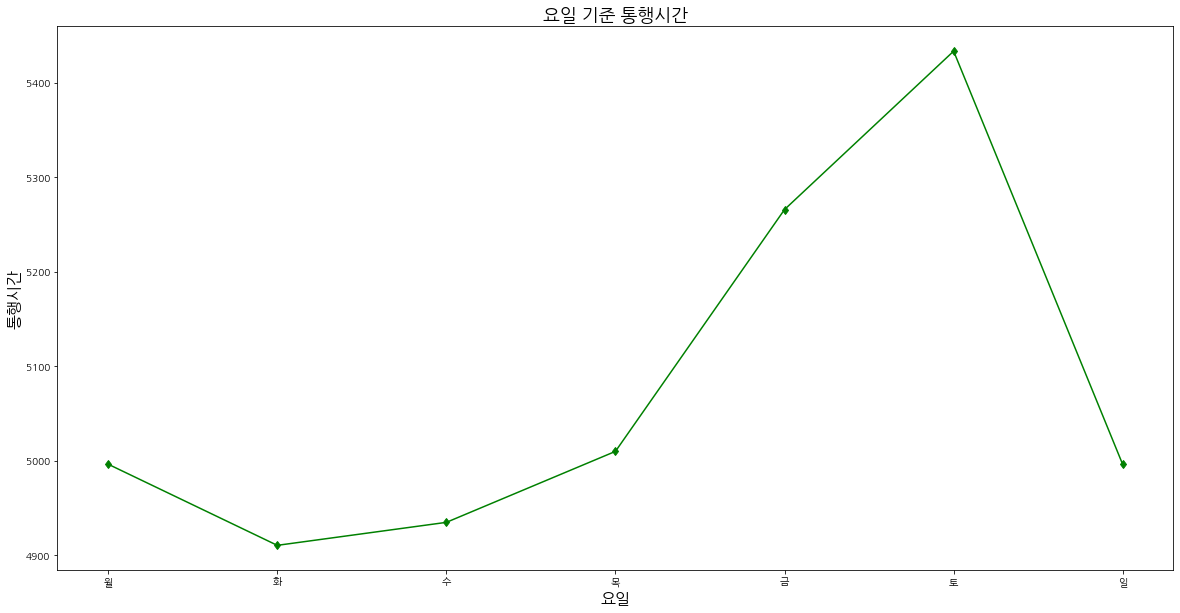

In [38]:
# Configure figure size
plt.figure(figsize=(20,10))
# Creae pie Chart
plt.plot(labels, values, marker='d', color='g')
# Generate labels and title
plt.title("요일 기준 통행시간",fontsize=18)
plt.xlabel('요일', fontdict= {'size':16})
plt.ylabel('통행시간', fontdict= {'size':16})
# Show plot
plt.show()